###  Etude sur Introduction aux réseaux de neurones artificiels 2 - classification

### test

### 1 - Importation des librairies Python nécessaires à la résolution du problème

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import pickle as pkl
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve

In [2]:
pd.set_option("max_columns", None)
pd.set_option("max_colwidth", None)
pd.set_option("max_row", 500)

### 2 - Chargement de modèle et des données test

In [3]:
model = joblib.load("model_MLPC.pkl")

In [4]:
model

MLPClassifier(hidden_layer_sizes=22, max_iter=10000, random_state=42,
              solver='lbfgs')

In [5]:
X_train = joblib.load("X_train.joblib")

In [6]:
y_train = joblib.load("y_train.joblib")

In [7]:
X_test = joblib.load("X_test.joblib")

In [8]:
y_test = joblib.load("y_test.joblib")

### 3 - test avec le modèle

In [9]:
model.score(X_test, y_test)

0.9736842105263158

In [10]:
y_predict_test = model.predict(X_test)

In [11]:
accuracy_test = accuracy_score(y_test, y_predict_test)
print(f'test accuracy: {accuracy_test}')

test accuracy: 0.9736842105263158


In [14]:
f1 = f1_score(y_test, y_predict_test)
print('F1 score for test: {:.3f}'.format(f1))

F1 score for test: 0.979


### cross entropy avec sklearn

In [59]:
# affichage de y_predit en dataframe
pd.DataFrame(model.predict(X_test)).head()

,0
0,1
1,0
2,0
3,1
4,1


In [58]:
#Cross-Entropy loss function, which allows probability estimates by running the predict_proba method.
pd.DataFrame(model.predict_proba(X_test)).head()

,0,1
0,0.000028,9.999720e-01
1,1.000000,8.711505e-56
2,1.000000,2.914965e-44
3,0.000000,1.000000e+00
4,0.000000,1.000000e+00


In [71]:
# pour afficher loss curve (cross entropy), il faut solver='sgd'
# notre model est solver='lbfgs', consigne de brief de Séb, donc j'ai créé un autre modèle pour l'afficher
model_sgd = joblib.load("model_MLPR_sgd.pkl")

In [68]:
# accuracy (score) est mieux que celui de solver='lbfgs'
model_sgd.score(X_test, y_test)

0.9824561403508771

accuracy (score)avec solver='sgd' est mieux que celui de solver='lbfgs'

In [74]:
y_predict_test_sgd = model_sgd.predict(X_test)

In [75]:
accuracy_test_sgd = accuracy_score(y_test, y_predict_test_sgd)
print(f'test accuracy: {accuracy_test_sgd}')

test accuracy: 0.9824561403508771


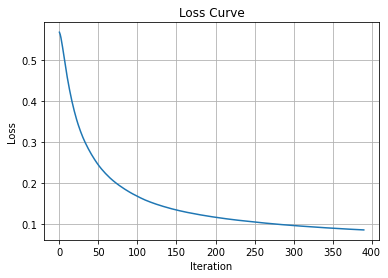

In [69]:
# L'historique des pertes (écarts entre les données de l'enseignant et les prédictions) est stocké dans clf.loss_curve_.
plt.title("Loss Curve")
plt.plot(model_sgd.loss_curve_)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.grid()
plt.show()

### 4 - Courbe ROC, AUC for test

In [18]:
roc_auc_score = roc_auc_score(y_test, y_predict_test)

In [19]:
print('AUC_test : {:.3f}'.format(roc_auc_score))

AUC_test : 0.974


In [20]:
fpr, tpr, thresholds = roc_curve(y_test, y_predict_test)
roc_auc = auc(fpr, tpr)
print('AUC_test : {:.3f}'.format(roc_auc))

AUC_test : 0.974


In [22]:
auc = auc(fpr, tpr)

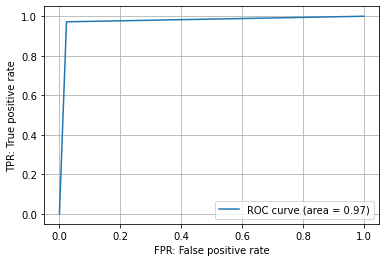

In [23]:
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
plt.legend()
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.grid()
plt.show()

### 5 - matrix de confusion

In [24]:
#création de matrix de confusion
cm_test = confusion_matrix(y_test, y_predict_test)

In [25]:
cm_test

array([[42,  1],
       [ 2, 69]], dtype=int64)

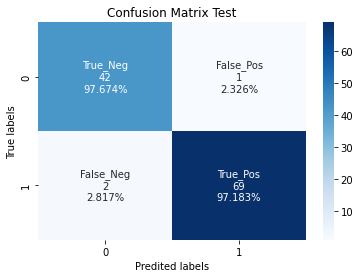

In [26]:
#pour RAJOUTER les labels et les pourcentages sur le graphique, passer par seaborn
#fig = plt.figure(figsize=(15, 7), dpi=100)
ax= plt.subplot()

group_names = ['True_Neg','False_Pos','False_Neg','True_Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm_test.flatten()]
group_percentages1 = ["{0:.3%}".format(value) for value in cm_test.flatten()[0:2]/np.sum(cm_test.flatten()[0:2])]
group_percentages2 = ["{0:.3%}".format(value) for value in cm_test.flatten()[2:]/np.sum(cm_test.flatten()[2:])]
group_percentages = np.append(group_percentages1, group_percentages2).tolist()
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip (group_names, group_counts, group_percentages)]
labels = np.array(labels).reshape(2,2)

sns.heatmap(cm_test, annot=labels, fmt='', cmap='Blues')

ax.set_xlabel('Predited labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix Test') 

plt.show()

Observation (score = accuracy):
    
         train score : 1.000000 
    validation score : 0.964796
          test score : 0.9736842105263158
                
hyperparamètre de modèle:
    
             'activation': 'relu',
                  'alpha': 0.0001,
     'hidden_layer_sizes': 22,
                'max_fun': 15000,
               'max_iter': 10000,
           'random_state': 42,
                 'solver': 'lbfgs'


https://qiita.com/maskot1977/items/d0253e1eab1ff1315dff

https://scikit-learn.org/stable/modules/neural_networks_supervised.html

https://free.kikagaku.ai/tutorial/basic_of_machine_learning/learn/machine_learning_classification

https://vidyasheela.com/post/what-is-difference-between-cost-function-and-loss-function